In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
matches = pd.read_csv("../../matching.csv")
fd = pd.read_csv("/Users/jan/ai4good/data/reforestree/field_data.csv")

In [3]:
matches.set_index("Unnamed: 0", inplace=True)

In [47]:
#using google fonts in matplotlib
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
import matplotlib.font_manager as fm

github_url = "https://github.com/google/fonts/blob/ff11ed915971ee26c88f442f37308142d4217979/apache/roboto/Roboto%5Bwdth%2Cwght%5D.ttf"

url = github_url + '?raw=true'  # You want the actual file, not some html

response = urlopen(url)
with NamedTemporaryFile(delete=False, suffix='.ttf') as f:
    f.write(response.read())

prop = fm.FontProperties(fname=f.name)

In [50]:
prop

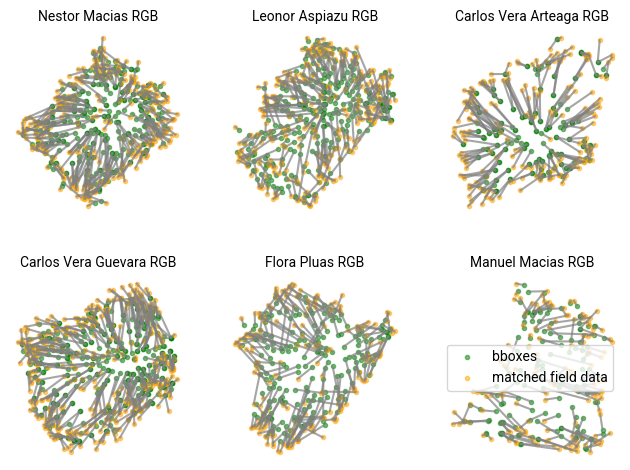

In [84]:
fig, ax = plt.subplots(2, 3)

for t, site in enumerate(fd.site.unique()):
    bboxes = matches.loc[matches.site == site, ["Ycenter", "Xcenter"]].values
    matches_site = matches.loc[matches.site == site, "matches"]
    is_match = fd.index.isin(matches_site) 
    dp_matched = fd.loc[is_match, ["Y", "X"]].values
    dp_unmatched = fd.loc[~is_match & (fd.site == site), ["Y", "X"]].values

    j = t % 3
    i = (1 if t >= 3 else 0)

    ax[i, j].xaxis.set_ticks([])
    ax[i, j].yaxis.set_ticks([])
    label = "bboxes" 
    ax[i, j].scatter(bboxes[:, 0], bboxes[:, 1], label=label, marker=".", alpha=0.5, color="g")
    label = "matched field data" 
    ax[i, j].scatter(dp_matched[:, 0], dp_matched[:, 1], label=label, marker=".", alpha=0.5, color="orange")
    #ax[i, j].scatter(dp_unmatched[:, 0], dp_unmatched[:, 1], alpha=0.5, marker=".", color="yellow")
    for k, match in enumerate(matches_site):
        x = bboxes[k, :]
        y = fd.loc[match, ["Y", "X"]].values
        ax[i, j].plot([x[0], y[0]], [x[1], y[1]], alpha=.7, color="grey")
    ax[i, j].set_title(site, fontdict={"fontsize": 6}, fontproperties=prop)
    ax[i, j].invert_yaxis()
    ax[i, j].set_axis_off()

    if i == 1 and j == 2:
        ax[i, j].legend(prop=prop, loc="center right")

#fig.legend(loc="lower center", prop=prop, bbox_to_anchor=(0, 0, 1, 0.1)) 
fig.tight_layout(h_pad=3)

In [82]:
fig.savefig("matching.png")

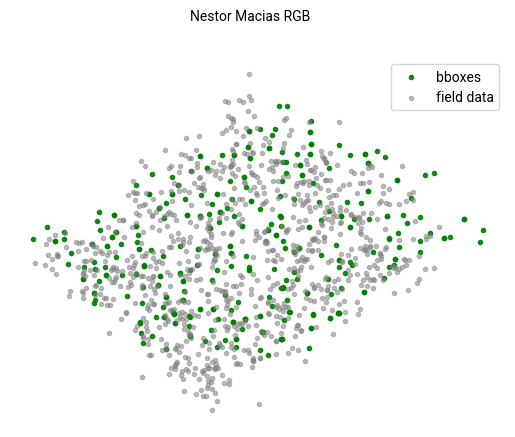

In [83]:
site = "Nestor Macias RGB"

fig, ax = plt.subplots(1, 1)

bboxes = matches.loc[matches.site == site, ["Ycenter", "Xcenter"]].values
matches_site = matches.loc[matches.site == site, "matches"]
is_match = fd.index.isin(matches_site) 
dp_matched = fd.loc[is_match, ["Y", "X"]].values
dp_unmatched = fd.loc[~is_match & (fd.site == site), ["Y", "X"]].values
fd_site = fd.loc[fd.site == site, ["X", "Y"]].values

ax.scatter(bboxes[:, 1], bboxes[:, 0], label="bboxes", marker=".", alpha=0.9, color="g")
#ax.scatter(dp_matched[:, 1], dp_matched[:, 0], label="matched", marker=".", alpha=0.5, color="orange")
ax.scatter(fd_site[:, 1], fd_site[:, 0], label="field data", marker=".", alpha=0.5, color="grey")
ax.invert_yaxis()
ax.legend(prop=prop)
ax.set_axis_off()
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
fig.suptitle(site, fontproperties=prop)
#ax.scatter(dp_unmatched[:, 1], dp_unmatched[:, 0], label="not matched", marker=".", alpha=0.5, color="purple")
fig.savefig("nestormacias.png")

In [85]:
import rasterio
from rasterio.mask import mask

In [86]:
site = "Nestor Macias RGB"

In [88]:
from boundary import create_boundary

In [90]:
path_to_rf = "/Users/jan/ai4good/data/reforestree/"
boundary = create_boundary(site, path_to_rf, shape="alphashape")

In [91]:
with rasterio.open(f"/Users/jan/ai4good/data/reforestree/wwf_ecuador/RGB Orthomosaics/{site}.tif") as rs:
    img = rs.read()

In [110]:
final_df = pd.read_csv(path_to_rf + "mapping/final_dataset.csv")
final_df_site = final_df[final_df.site == site]

In [112]:
final_df.columns

Index(['img_path', 'xmin', 'ymin', 'xmax', 'ymax', 'score', 'img_name',
       'tile_index', 'tile_xmin', 'tile_ymin', 'tile_xmax', 'tile_ymax', 'x',
       'y', 'Xmin', 'Ymin', 'Xmax', 'Ymax', 'X_d', 'Y_d', 'lon_d', 'lat_d',
       'is_musacea_d', 'is_banana', 'ground_index', 'name', 'lat_g', 'lon_g',
       'diameter', 'height', 'year', 'plot_id', 'tree_id', 'is_musacea_g',
       'site', 'X_g', 'Y_g', 'updated diameter', 'group', 'updated height',
       'AGB', 'carbon', 'id'],
      dtype='object')

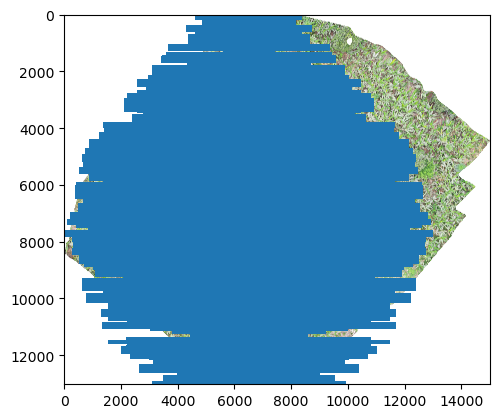

In [118]:
fig, ax = plt.subplots(1, 1)

ax.imshow(np.moveaxis(img, 0, -1))
ax.set_axis_off()

for i, row in final_df_site.iterrows():

    xmin, xmax, ymin, ymax = row[["Xmin", "Xmax", "Ymin", "Ymax"]].astype("int").values
    ymin = img.shape[1] - ymax
    ymax = img.shape[1] - ymin
    rec = plt.Rectangle([ymin, xmin], ymax - ymin, xmax-xmin)
    ax.add_patch(rec)

In [119]:
xmin

9034

In [120]:
xmax

9235

In [4]:
site = "Flora Pluas RGB"
matches_flora = matches[matches.site == site]
fd_flora = fd[fd.site == site]

In [5]:
matches_flora.carbon.sum()

1418.3039764427235

In [6]:
len(matches)

1564